In [1]:
# data manipulation libraries
import pandas as pd
import numpy as np

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml

In [2]:
def one_hot(df, categorical_cols):
    """
    This definition can be used to one hot encode categorical data
    
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)


In [3]:
housing = fetch_openml(name="house_prices", as_frame=True)  

housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']

In [4]:
housing_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


In [5]:
columns_to_drop = ['Neighborhood',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'BsmtFinType2',
 'Functional',
 'GarageType',
 'BsmtFinType1',
 'Heating',
 'Foundation',
 'Electrical',
 'SaleCondition',
 'RoofStyle',
 'GarageQual',
 'GarageCond',
 'FireplaceQu']


In [6]:
housing_df.drop(columns_to_drop, axis = 1, inplace=True)

In [7]:
housing_df.shape

(1460, 61)

In [8]:
housing_df.to_pickle("../data/housing_data.pkl")

In [9]:
housing_data = pd.read_pickle("../data/housing_data.pkl")

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  OverallQual    1460 non-null   float64
 14  OverallCond    1460 non-null   float64
 15  YearBuilt      1460 non-null   float64
 16  YearRemodAdd   1460 non-null   float64
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

In [11]:
target = housing_data["target"]

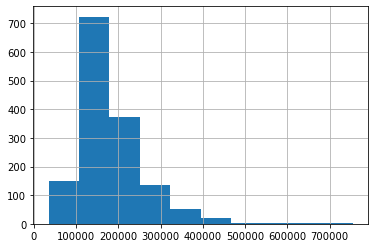

In [12]:
# Predicting the price of a house is a regression problem

target.hist(); # YES the target is skewed

In [13]:
# categorical features
object_features = list(housing_data.select_dtypes(['object']).columns)
object_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
missing_value_df = housing_data.isnull().mean().to_frame()
missing_value_df.columns=["percent_missing"]
cols_to_drop = list(missing_value_df[missing_value_df.percent_missing > 0.4].index)

In [15]:
cols_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [16]:
housing_data.drop(cols_to_drop, axis=1, inplace=True)

In [17]:
housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [18]:
target = housing_data["target"]

In [19]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: target, Length: 1460, dtype: float64

In [20]:
features = housing_data.drop(["target"], axis = 1)

In [21]:
features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,Y,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,Y,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,Y,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,Y,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [22]:
features.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
BldgType           0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF   

In [23]:
features.LotFrontage.fillna(housing_data.LotFrontage.mean(), inplace = True)
features.MasVnrType.fillna("Unkown", inplace = True)
features.MasVnrArea.fillna(housing_data.MasVnrArea.mean(), inplace = True)
features.BsmtQual.fillna("Unkown", inplace = True)
features.BsmtCond.fillna("Unkown", inplace = True)
features.BsmtExposure.fillna("Unkown", inplace = True)
features.GarageYrBlt.fillna(housing_data.GarageYrBlt.mean(), inplace = True)
features.GarageFinish.fillna("Unkown", inplace = True)
features.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
BldgType         0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    